### Project done by :- Pratik Datey

### Project:-Comcast Telecom Consumer Complaints 

### DESCRIPTION

Comcast is an American global telecommunication company. The firm has been providing terrible customer service. They continue to fall short despite repeated promises to improve. Only last month (October 2016) the authority fined them a $2.3 million, after receiving over 1000 consumer complaints.
The existing database will serve as a repository of public customer complaints filed against Comcast.
It will help to pin down what is wrong with Comcast's customer service.

In [1]:
import numpy as np
import pandas as pd

### 1) Import data into Python environment.

In [2]:
data=pd.read_csv('Comcast_telecom_complaints_data.csv')
data.head()

,Ticket #,Customer Complaint,Date,Date_month_year,Time,Received Via,City,State,Zip code,Status,Filing on Behalf of Someone
0,250635,Comcast Cable Internet Speeds,22-04-15,22-Apr-15,3:53:50 PM,Customer Care Call,Abingdon,Maryland,21009,Closed,No
1,223441,Payment disappear - service got disconnected,04-08-15,04-Aug-15,10:22:56 AM,Internet,Acworth,Georgia,30102,Closed,No
2,242732,Speed and Service,18-04-15,18-Apr-15,9:55:47 AM,Internet,Acworth,Georgia,30101,Closed,Yes
3,277946,Comcast Imposed a New Usage Cap of 300GB that ...,05-07-15,05-Jul-15,11:59:35 AM,Internet,Acworth,Georgia,30101,Open,Yes
4,307175,Comcast not working and no service to boot,26-05-15,26-May-15,1:25:26 PM,Internet,Acworth,Georgia,30101,Solved,No


In [3]:
data['date_index'] = data['Date_month_year'] +' '+ data['Time']

In [4]:
data.head()

,Ticket #,Customer Complaint,Date,Date_month_year,Time,Received Via,City,State,Zip code,Status,Filing on Behalf of Someone,date_index
0,250635,Comcast Cable Internet Speeds,22-04-15,22-Apr-15,3:53:50 PM,Customer Care Call,Abingdon,Maryland,21009,Closed,No,22-Apr-15 3:53:50 PM
1,223441,Payment disappear - service got disconnected,04-08-15,04-Aug-15,10:22:56 AM,Internet,Acworth,Georgia,30102,Closed,No,04-Aug-15 10:22:56 AM
2,242732,Speed and Service,18-04-15,18-Apr-15,9:55:47 AM,Internet,Acworth,Georgia,30101,Closed,Yes,18-Apr-15 9:55:47 AM
3,277946,Comcast Imposed a New Usage Cap of 300GB that ...,05-07-15,05-Jul-15,11:59:35 AM,Internet,Acworth,Georgia,30101,Open,Yes,05-Jul-15 11:59:35 AM
4,307175,Comcast not working and no service to boot,26-05-15,26-May-15,1:25:26 PM,Internet,Acworth,Georgia,30101,Solved,No,26-May-15 1:25:26 PM


### 1.1) Coverting into Datetime format

In [5]:
data['date_index']=pd.to_datetime(data['date_index'])


In [6]:
data['Date_month_year']=pd.to_datetime(data['Date_month_year'])

### 1.2) set the index

In [7]:
data = data.set_index(data['date_index'])

In [8]:
data.head()

,Ticket #,Customer Complaint,Date,Date_month_year,Time,Received Via,City,State,Zip code,Status,Filing on Behalf of Someone,date_index
date_index,,,,,,,,,,,,
2015-04-22 15:53:50,250635,Comcast Cable Internet Speeds,22-04-15,2015-04-22,3:53:50 PM,Customer Care Call,Abingdon,Maryland,21009,Closed,No,2015-04-22 15:53:50
2015-08-04 10:22:56,223441,Payment disappear - service got disconnected,04-08-15,2015-08-04,10:22:56 AM,Internet,Acworth,Georgia,30102,Closed,No,2015-08-04 10:22:56
2015-04-18 09:55:47,242732,Speed and Service,18-04-15,2015-04-18,9:55:47 AM,Internet,Acworth,Georgia,30101,Closed,Yes,2015-04-18 09:55:47
2015-07-05 11:59:35,277946,Comcast Imposed a New Usage Cap of 300GB that ...,05-07-15,2015-07-05,11:59:35 AM,Internet,Acworth,Georgia,30101,Open,Yes,2015-07-05 11:59:35
2015-05-26 13:25:26,307175,Comcast not working and no service to boot,26-05-15,2015-05-26,1:25:26 PM,Internet,Acworth,Georgia,30101,Solved,No,2015-05-26 13:25:26


In [9]:
Date_month_year=data['Date_month_year'].value_counts()
Date_month_year

2015-06-24    218
2015-06-23    190
2015-06-25     98
2015-06-26     55
2015-06-30     53
             ... 
2015-02-05      7
2015-12-05      7
2015-05-04      6
2015-03-05      5
2015-11-04      5
Name: Date_month_year, Length: 91, dtype: int64

In [10]:
import matplotlib.pyplot as plt
%matplotlib inline

### 2) Provide the trend chart for the number of complaints at daily granularity levels.

Text(0.5, 1.0, 'Complaints as per Daily granularity levels')

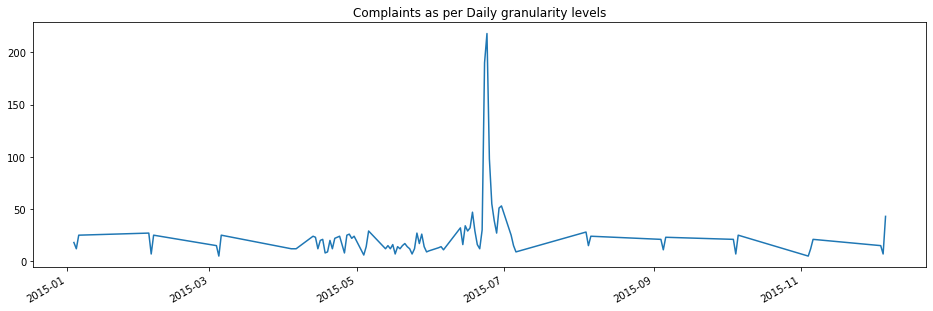

In [11]:
Date_month_year.plot(kind='line',figsize=(16,5))
plt.title('Complaints as per Daily granularity levels')

In [12]:
data.dtypes

Ticket #                               object
Customer Complaint                     object
Date                                   object
Date_month_year                datetime64[ns]
Time                                   object
Received Via                           object
City                                   object
State                                  object
Zip code                                int64
Status                                 object
Filing on Behalf of Someone            object
date_index                     datetime64[ns]
dtype: object

### 2.1) Grouping by number of complaints at Monthly

In [13]:
month = data.groupby(pd.Grouper(freq="M")).size()
month

date_index
2015-01-31      55
2015-02-28      59
2015-03-31      45
2015-04-30     375
2015-05-31     317
2015-06-30    1046
2015-07-31      49
2015-08-31      67
2015-09-30      55
2015-10-31      53
2015-11-30      38
2015-12-31      65
Freq: M, dtype: int64

### 2.2) Provide the trend chart for the number of complaints at monthly 

Text(0.5, 1.0, 'Complaints as per Monthly')

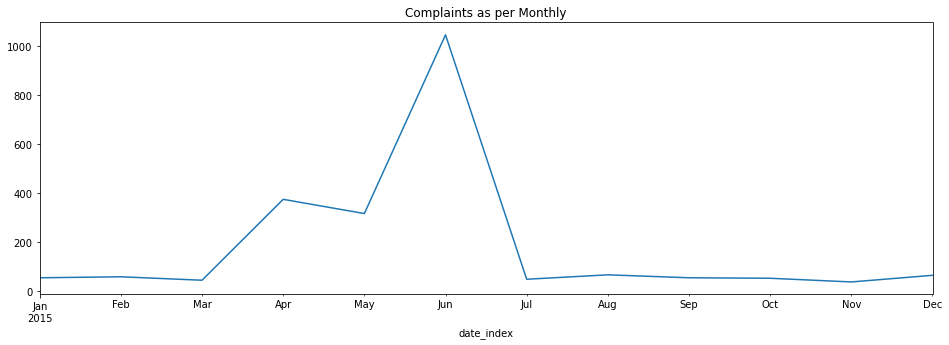

In [14]:
month.plot(kind='line',figsize=(16,5))
plt.title('Complaints as per Monthly')

In [39]:
data['Customer Complaint'].unique()

array(['Comcast Cable Internet Speeds',
       'Payment disappear - service got disconnected',
       'Speed and Service', ..., 'complaint about comcast',
       'Extremely unsatisfied Comcast customer',
       'Comcast, Ypsilanti MI Internet Speed'], dtype=object)

In [15]:
customer_comp=data['Customer Complaint'].str.title().value_counts()
customer_comp

Comcast                             102
Comcast Data Cap                     30
Comcast Internet                     29
Comcast Data Caps                    21
Comcast Billing                      18
                                   ... 
Unfair Bundles                        1
Comcast Bill Internet Usage           1
Comcast Speeds Not As Advertised      1
Comcast Price Inflation               1
No Service For 5+ Days                1
Name: Customer Complaint, Length: 1740, dtype: int64

### 3) Provide a table with the frequency of complaint types.

In [16]:
customer_comp.to_frame()

,Customer Complaint
Comcast,102
Comcast Data Cap,30
Comcast Internet,29
Comcast Data Caps,21
Comcast Billing,18
...,...
Unfair Bundles,1
Comcast Bill Internet Usage,1
Comcast Speeds Not As Advertised,1
Comcast Price Inflation,1


In [17]:
print(customer_comp.idxmax())
print(customer_comp.max())

Comcast
102


In [18]:
print("Maximum customer complaints is from {} & which is {}. ".format('Comcast','102'))

Maximum customer complaints is from Comcast & which is 102. 


### 4) Create a new categorical variable with value as Open and Closed. Open & Pending is to be categorized as Open and Closed & Solved is to be categorized as Closed.

In [19]:
data['newstatus']=["Open" if Status=="Open" or Status=="Pending" else "Closed" for Status in data["Status"]]
   

In [20]:
data.head()

,Ticket #,Customer Complaint,Date,Date_month_year,Time,Received Via,City,State,Zip code,Status,Filing on Behalf of Someone,date_index,newstatus
date_index,,,,,,,,,,,,,
2015-04-22 15:53:50,250635,Comcast Cable Internet Speeds,22-04-15,2015-04-22,3:53:50 PM,Customer Care Call,Abingdon,Maryland,21009,Closed,No,2015-04-22 15:53:50,Closed
2015-08-04 10:22:56,223441,Payment disappear - service got disconnected,04-08-15,2015-08-04,10:22:56 AM,Internet,Acworth,Georgia,30102,Closed,No,2015-08-04 10:22:56,Closed
2015-04-18 09:55:47,242732,Speed and Service,18-04-15,2015-04-18,9:55:47 AM,Internet,Acworth,Georgia,30101,Closed,Yes,2015-04-18 09:55:47,Closed
2015-07-05 11:59:35,277946,Comcast Imposed a New Usage Cap of 300GB that ...,05-07-15,2015-07-05,11:59:35 AM,Internet,Acworth,Georgia,30101,Open,Yes,2015-07-05 11:59:35,Open
2015-05-26 13:25:26,307175,Comcast not working and no service to boot,26-05-15,2015-05-26,1:25:26 PM,Internet,Acworth,Georgia,30101,Solved,No,2015-05-26 13:25:26,Closed


In [21]:
state=data.groupby(data['State']).size().sort_values(ascending=False)
state.to_frame().reset_index().rename({0:'count'},axis=1)

,State,count
0,Georgia,288
1,Florida,240
2,California,220
3,Illinois,164
4,Tennessee,143
5,Pennsylvania,130
6,Michigan,115
7,Washington,98
8,Colorado,80
9,Maryland,78


In [22]:
Status_complaints = data.groupby(['State','newstatus']).size().unstack().fillna(0)
Status_complaints

newstatus,Closed,Open
State,,
Alabama,17.0,9.0
Arizona,14.0,6.0
Arkansas,6.0,0.0
California,159.0,61.0
Colorado,58.0,22.0
Connecticut,9.0,3.0
Delaware,8.0,4.0
District Of Columbia,14.0,2.0
District of Columbia,1.0,0.0


### 5) Provide state wise status of complaints in a stacked bar chart.

<AxesSubplot:ylabel='State'>

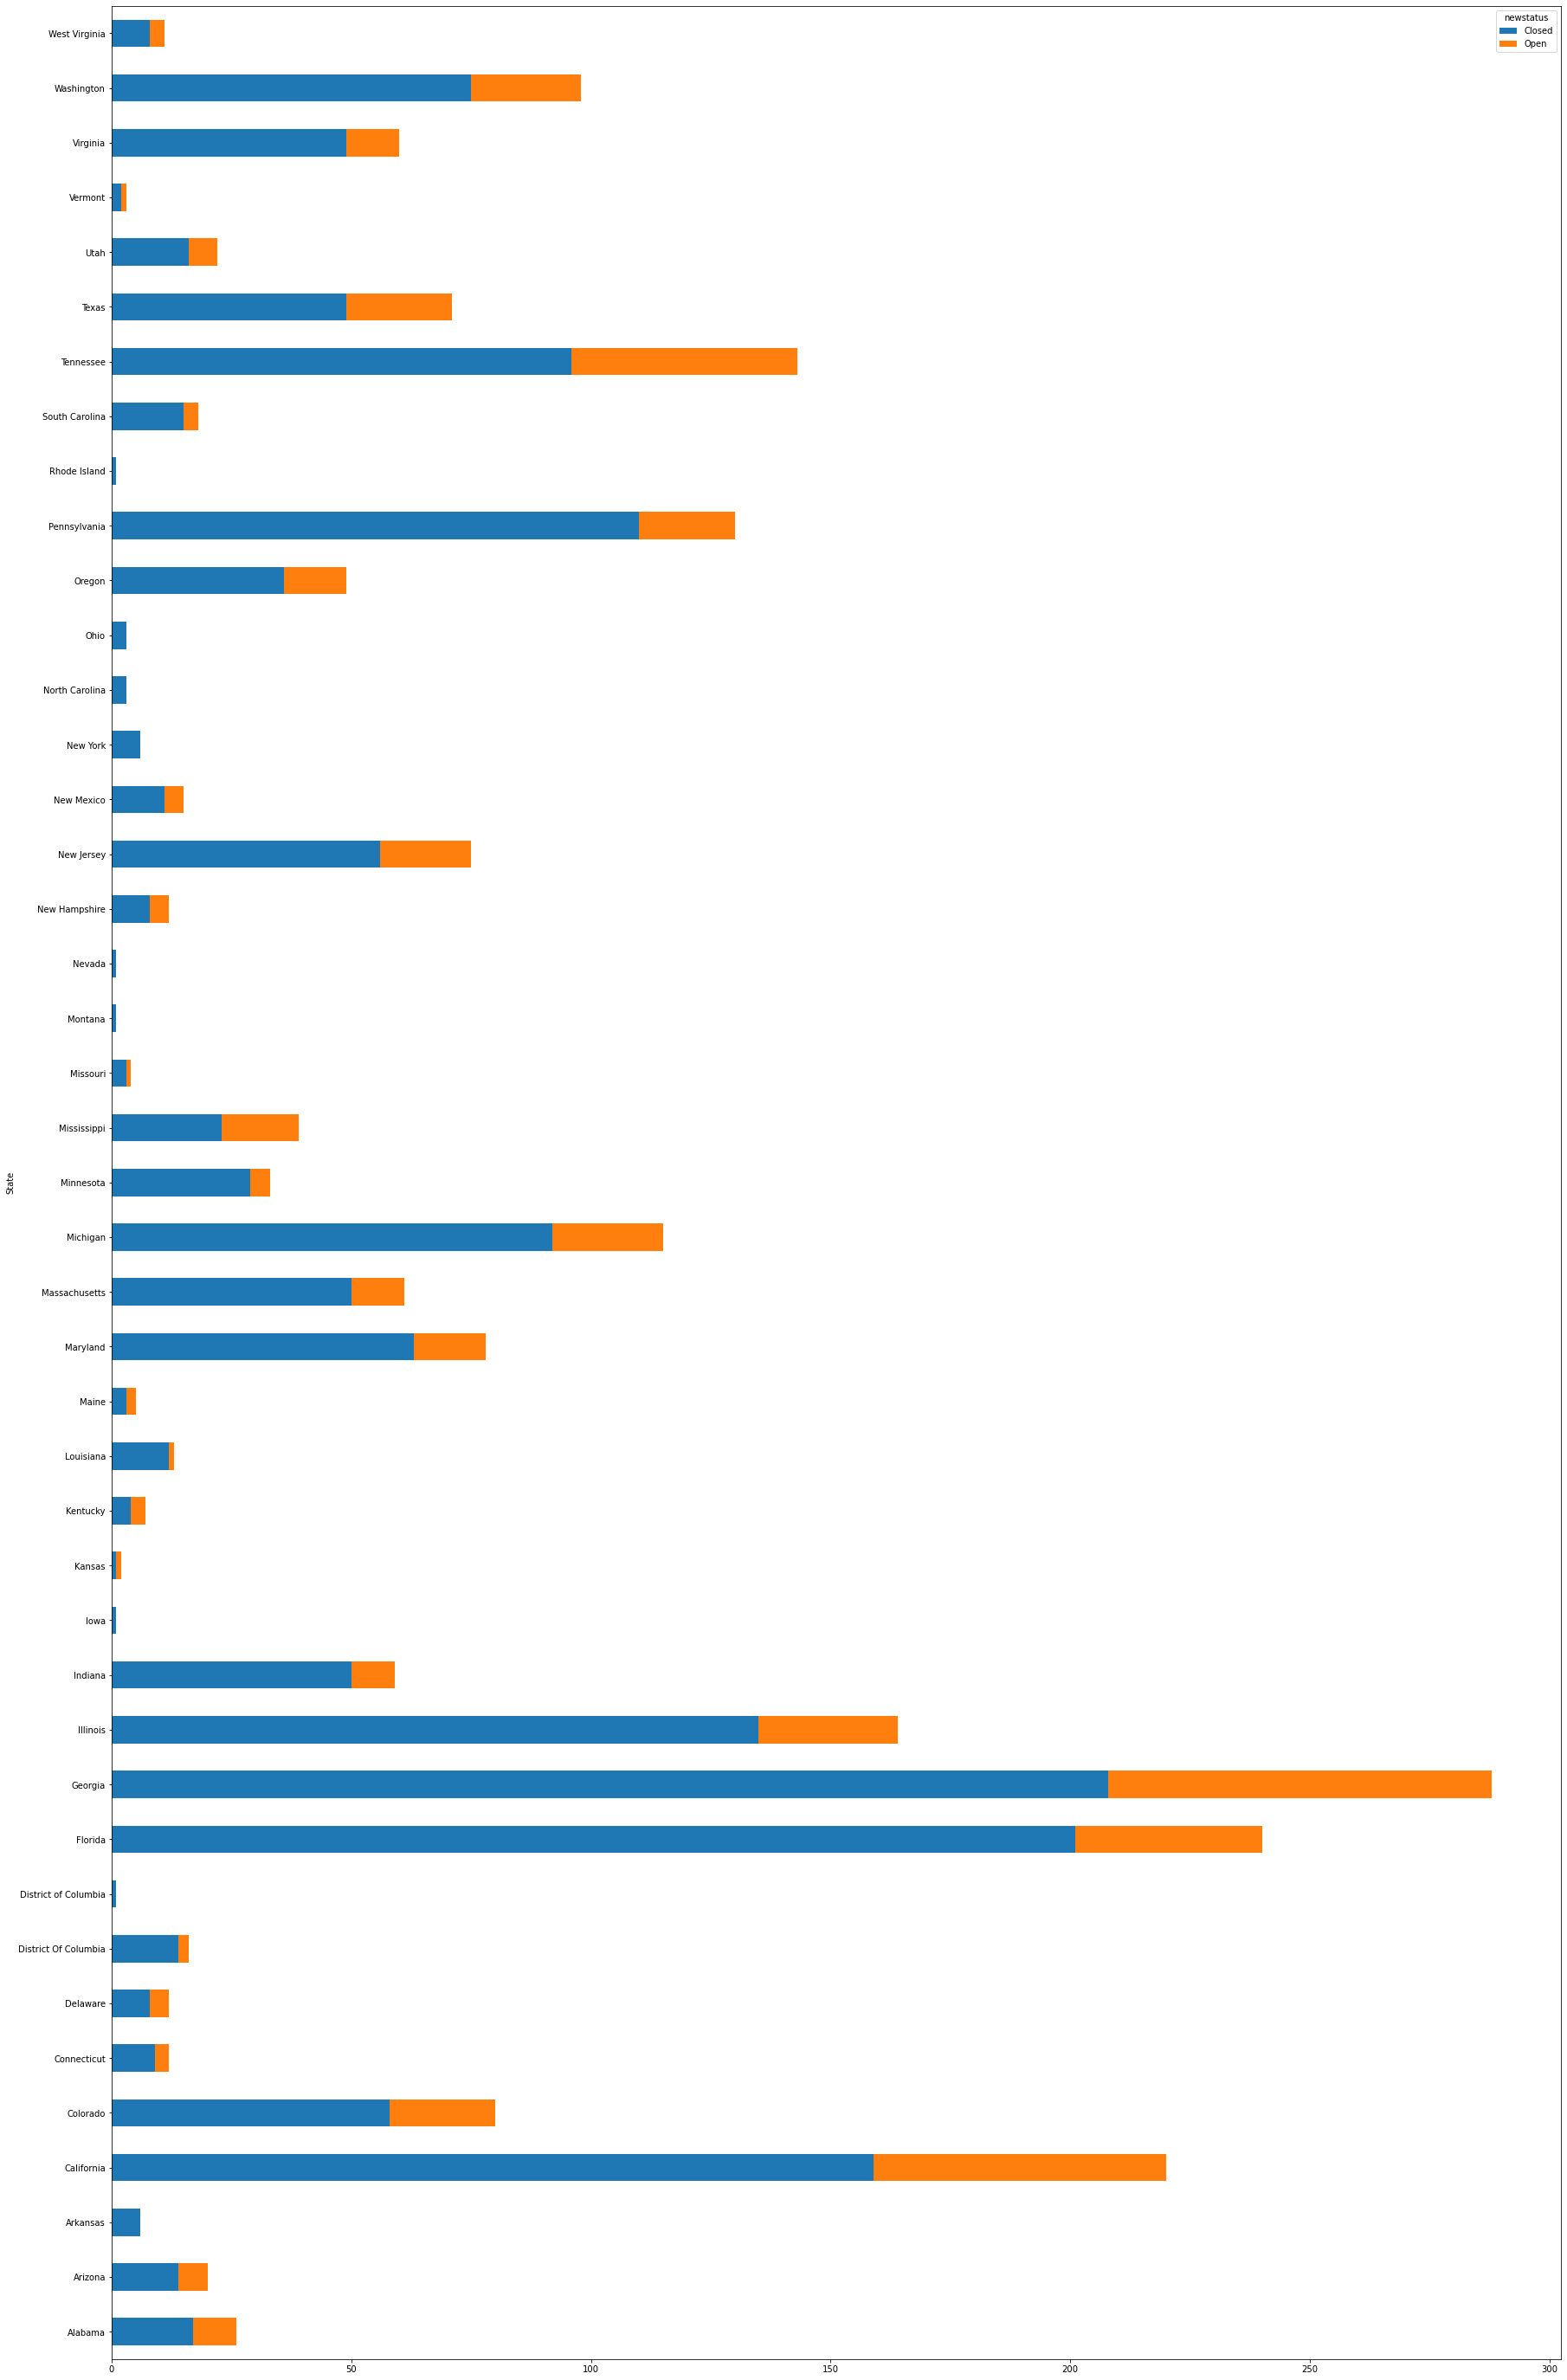

In [23]:
Status_complaints.plot(kind='barh',figsize=(30,50),stacked=True)

In [51]:
print('State where most complaint is:-')
print(Status_complaints.idxmax())

State where most complaint is:-
newstatus
Closed    Georgia
Open      Georgia
dtype: object


In [49]:
print('Total complaint in Georgia is ')
print(Status_complaints.max().sum())

Total complaint in Georgia is 
288.0


In [50]:
print('Maximum Open & Closed compaints  is')
print(Status_complaints.max())

Maximum Open & Closed compaints  is
newstatus
Closed    208.0
Open       80.0
dtype: float64


### 6) state who has the maximum complaints

In [52]:
print("Maximum customer complaints is from {} & which is {}. ".format('Georgia','280'))

Maximum customer complaints is from Georgia & which is 280. 


### State who has the highest numbers of unresolved complaints

In [54]:
print(' State who has the highest percentage of unresolved complaints is {} which is {}'.format('Georgia','80'))

 State who has the highest percentage of unresolved complaints is Georgia which is 80


In [25]:
Status_complaints.sum()

newstatus
Closed    1707.0
Open       517.0
dtype: float64

### 7) State who has the highest percentage of unresolved complaints

In [26]:
(80/517)*100


15.473887814313347

In [27]:
data['Received Via'].groupby(data['newstatus']).size()

newstatus
Closed    1707
Open       517
Name: Received Via, dtype: int64

In [28]:
new=data['Received Via'].groupby(data['newstatus'])
new.value_counts()

newstatus  Received Via      
Closed     Customer Care Call    864
           Internet              843
Open       Internet              262
           Customer Care Call    255
Name: Received Via, dtype: int64

In [56]:
new.size()

newstatus
Closed    1707
Open       517
Name: Received Via, dtype: int64

### 8) The percentage of complaints resolved till date, received through the Internet.

In [57]:
print('Percentage of complaints resolved till date, which were received through the Internet is :-')
(863/1707)*100

Percentage of complaints resolved till date, which were received through the Internet is :-


50.55653192735794

### 9) the percentage of complaints resolved till date, received through the customer care calls.

In [58]:
print('Percentage of complaints resolved till date, which were received through the Customer Care Call  is :-')
(843/1707)*100

Percentage of complaints resolved till date, which were received through the Customer Care Call  is :-


49.38488576449912